In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "./images/kvasir/images/"
mask_dir = "./images/kvasir/masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 100
learning_rate  = 1e-005
in_channels    = 3
out_channels   = 2
batch_size     = 5
loss_type      = 'CE'
model_type     = 'unet_rd'
labels         = [0, 1]

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNetRd(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): NormalizedDoubleConv(
      (first_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=1024, bias=False)
        (pointwise): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (first_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (first_actv): ReLU(inplace=True)
      (attention): AttentionConv2d(
        (conv): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
        (attn): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
        (sigmoid): Sigmoid()
        (relu): ReLU()
      )
      (skip_conn): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.35it/s, loss=0.545]


Ave Loss: 0.5472120906625475
Ave Accuracy: 0.7977897135416666
Ave F1: 0.6634103894633909
Ave Precision: 0.6674090135366074
Ave Recall: 0.7919105680166699
Ave Specificity: 0.7919105680166699
Saving model to test.pth...
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.26it/s, loss=0.481]


Ave Loss: 0.4478491900222642
Ave Accuracy: 0.8331966145833334
Ave F1: 0.6915192564065349
Ave Precision: 0.6959879974796546
Ave Recall: 0.7947055496288519
Ave Specificity: 0.7947055496288519
Saving model to test.pth...
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.58it/s, loss=0.397]


Ave Loss: 0.37373817414045335
Ave Accuracy: 0.8390852864583334
Ave F1: 0.6984820944753137
Ave Precision: 0.703118192133602
Ave Recall: 0.8005605771596636
Ave Specificity: 0.8005605771596636
Saving model to test.pth...
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.71it/s, loss=0.301]


Ave Loss: 0.29185330963560513
Ave Accuracy: 0.8410384114583334
Ave F1: 0.6983599913076094
Ave Precision: 0.7039029437341546
Ave Recall: 0.7954152191682327
Ave Specificity: 0.7954152191682327
Saving model to test.pth...
Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.01it/s, loss=0.254]


Ave Loss: 0.2252895970429693
Ave Accuracy: 0.84328125
Ave F1: 0.6994901891049176
Ave Precision: 0.705356206466885
Ave Recall: 0.7898995151254885
Ave Specificity: 0.7898995151254885
Saving model to test.pth...
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 15.82it/s, loss=0.262]


Ave Loss: 0.19197588435241153
Ave Accuracy: 0.84052734375
Ave F1: 0.6906511302893973
Ave Precision: 0.7001546500750836
Ave Recall: 0.7763287679745934
Ave Specificity: 0.7763287679745934
Saving model to test.pth...
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.18it/s, loss=0.208]


Ave Loss: 0.16902218482324055
Ave Accuracy: 0.8293587239583333
Ave F1: 0.6725209354053042
Ave Precision: 0.6815813017022043
Ave Recall: 0.7578551617311827
Ave Specificity: 0.7578551617311827
Saving model to test.pth...
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.02it/s, loss=0.176]


Ave Loss: 0.14102633813662188
Ave Accuracy: 0.8421712239583333
Ave F1: 0.6897115824717455
Ave Precision: 0.6988047468894278
Ave Recall: 0.771579576034809
Ave Specificity: 0.771579576034809
Saving model to test.pth...
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.77it/s, loss=0.133]


Ave Loss: 0.11914608015545777
Ave Accuracy: 0.8437890625
Ave F1: 0.6931694363088599
Ave Precision: 0.7009281887458337
Ave Recall: 0.7766340176841292
Ave Specificity: 0.7766340176841292
Saving model to test.pth...
Epoch: 9


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 15.95it/s, loss=0.12]


Ave Loss: 0.11147314421832562
Ave Accuracy: 0.849765625
Ave F1: 0.6978481374982097
Ave Precision: 0.7092964865549347
Ave Recall: 0.7741100839143877
Ave Specificity: 0.7741100839143877
Saving model to test.pth...
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.54it/s, loss=0.115]


Ave Loss: 0.10100083569330828
Ave Accuracy: 0.8503385416666667
Ave F1: 0.6930558508247372
Ave Precision: 0.7071451669111977
Ave Recall: 0.7610137324138484
Ave Specificity: 0.7610137324138484
Saving model to test.pth...
Epoch: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.18it/s, loss=0.101]


Ave Loss: 0.09175152648240328
Ave Accuracy: 0.8487858072916666
Ave F1: 0.6909975926288242
Ave Precision: 0.7051269343754536
Ave Recall: 0.7623474427966571
Ave Specificity: 0.7623474427966571
Saving model to test.pth...
Epoch: 12


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.09it/s, loss=0.0825]


Ave Loss: 0.08340576525245394
Ave Accuracy: 0.841162109375
Ave F1: 0.6821522154817373
Ave Precision: 0.697586212467626
Ave Recall: 0.7554425835778911
Ave Specificity: 0.7554425835778911
Saving model to test.pth...
Epoch: 13


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.50it/s, loss=0.0855]


Ave Loss: 0.0783646961408002
Ave Accuracy: 0.8508919270833334
Ave F1: 0.6955635791199615
Ave Precision: 0.7102740644888754
Ave Recall: 0.7650325911637965
Ave Specificity: 0.7650325911637965
Saving model to test.pth...
Epoch: 14


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.89it/s, loss=0.0659]


Ave Loss: 0.07398880328983068
Ave Accuracy: 0.8519986979166667
Ave F1: 0.694294006515392
Ave Precision: 0.7095999201134868
Ave Recall: 0.7618188179944089
Ave Specificity: 0.7618188179944089
Saving model to test.pth...
Epoch: 15


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.49it/s, loss=0.0702]


Ave Loss: 0.06751326274658953
Ave Accuracy: 0.8528385416666666
Ave F1: 0.6922704483200188
Ave Precision: 0.7092102226505745
Ave Recall: 0.7571776742864179
Ave Specificity: 0.7571776742864179
Saving model to test.pth...
Epoch: 16


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 15.72it/s, loss=0.0632]


Ave Loss: 0.05925473451082196
Ave Accuracy: 0.8480533854166666
Ave F1: 0.6840265492188704
Ave Precision: 0.6992146433708186
Ave Recall: 0.7491573034966124
Ave Specificity: 0.7491573034966124
Saving model to test.pth...
Epoch: 17


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 15.71it/s, loss=0.0682]


Ave Loss: 0.05648500730416604
Ave Accuracy: 0.8395865885416667
Ave F1: 0.6828444633290996
Ave Precision: 0.6953153116719503
Ave Recall: 0.7561829889485397
Ave Specificity: 0.7561829889485397
Saving model to test.pth...
Epoch: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.65it/s, loss=0.0534]


Ave Loss: 0.05103882572480611
Ave Accuracy: 0.84560546875
Ave F1: 0.6937084430973585
Ave Precision: 0.7054273383910548
Ave Recall: 0.7700594115856731
Ave Specificity: 0.7700594115856731
Saving model to test.pth...
Epoch: 19


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.32it/s, loss=0.0478]


Ave Loss: 0.0502607065652098
Ave Accuracy: 0.8563704427083333
Ave F1: 0.7039472342786182
Ave Precision: 0.7194499485981248
Ave Recall: 0.773897898377108
Ave Specificity: 0.773897898377108
Saving model to test.pth...
Epoch: 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.90it/s, loss=0.0513]


Ave Loss: 0.04653469246945211
Ave Accuracy: 0.8507063802083333
Ave F1: 0.6955282115551108
Ave Precision: 0.709260038692322
Ave Recall: 0.7629005275204392
Ave Specificity: 0.7629005275204392
Saving model to test.pth...
Epoch: 21


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.73it/s, loss=0.0528]


Ave Loss: 0.04315259728048529
Ave Accuracy: 0.843505859375
Ave F1: 0.691841794916197
Ave Precision: 0.7016355691793253
Ave Recall: 0.7698183589591072
Ave Specificity: 0.7698183589591072
Saving model to test.pth...
Epoch: 22


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.94it/s, loss=0.0525]


Ave Loss: 0.04106969921184438
Ave Accuracy: 0.85146484375
Ave F1: 0.698009908328924
Ave Precision: 0.7112707669371375
Ave Recall: 0.7697310818013512
Ave Specificity: 0.7697310818013512
Saving model to test.pth...
Epoch: 23


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.04it/s, loss=0.0508]


Ave Loss: 0.03920318460358041
Ave Accuracy: 0.849912109375
Ave F1: 0.6888740667399701
Ave Precision: 0.7035676880340103
Ave Recall: 0.7536275291967302
Ave Specificity: 0.7536275291967302
Saving model to test.pth...
Epoch: 24


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.69it/s, loss=0.0398]


Ave Loss: 0.038380571880510875
Ave Accuracy: 0.8520638020833333
Ave F1: 0.6858552460042355
Ave Precision: 0.7041778293051615
Ave Recall: 0.7437115599880543
Ave Specificity: 0.7437115599880543
Saving model to test.pth...
Epoch: 25


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.31it/s, loss=0.0387]


Ave Loss: 0.039853076756532706
Ave Accuracy: 0.8535677083333333
Ave F1: 0.6920151101850377
Ave Precision: 0.7099186573606053
Ave Recall: 0.7532819496127936
Ave Specificity: 0.7532819496127936
Saving model to test.pth...
Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.93it/s, loss=0.0591]


Ave Loss: 0.03784553480467626
Ave Accuracy: 0.8398209635416667
Ave F1: 0.6763292231443045
Ave Precision: 0.6918112075001465
Ave Recall: 0.7425820430739111
Ave Specificity: 0.7425820430739111
Saving model to test.pth...
Epoch: 27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.46it/s, loss=0.047]


Ave Loss: 0.03585502876500998
Ave Accuracy: 0.8479622395833334
Ave F1: 0.6894051574697293
Ave Precision: 0.7040393279370261
Ave Recall: 0.759776030958227
Ave Specificity: 0.759776030958227
Saving model to test.pth...
Epoch: 28


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.52it/s, loss=0.0414]


Ave Loss: 0.034871953898774725
Ave Accuracy: 0.8502701822916666
Ave F1: 0.6916521432761064
Ave Precision: 0.7063109109490269
Ave Recall: 0.7613698853386215
Ave Specificity: 0.7613698853386215
Saving model to test.pth...
Epoch: 29


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.07it/s, loss=0.0381]


Ave Loss: 0.0328833147484277
Ave Accuracy: 0.8515852864583333
Ave F1: 0.6869928318520713
Ave Precision: 0.7048467791838969
Ave Recall: 0.7482777395635046
Ave Specificity: 0.7482777395635046
Saving model to test.pth...
Epoch: 30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:11<00:00, 12.34it/s, loss=0.0334]


Ave Loss: 0.030878561775067023
Ave Accuracy: 0.851484375
Ave F1: 0.6863189920596117
Ave Precision: 0.7057443994350867
Ave Recall: 0.7466118076567252
Ave Specificity: 0.7466118076567252
Saving model to test.pth...
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.04it/s, loss=0.0521]


Ave Loss: 0.0286125700521682
Ave Accuracy: 0.8501139322916667
Ave F1: 0.6889285864589464
Ave Precision: 0.7063407479532859
Ave Recall: 0.7524468160911311
Ave Specificity: 0.7524468160911311
Saving model to test.pth...
Epoch: 32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.73it/s, loss=0.038]


Ave Loss: 0.02819739862212113
Ave Accuracy: 0.8464095052083334
Ave F1: 0.6876175550989987
Ave Precision: 0.7008074969939302
Ave Recall: 0.7559575800741917
Ave Specificity: 0.7559575800741917
Saving model to test.pth...
Epoch: 33


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.02it/s, loss=0.0407]


Ave Loss: 0.02741313103054251
Ave Accuracy: 0.8424479166666666
Ave F1: 0.6869541183931056
Ave Precision: 0.6971363564497
Ave Recall: 0.7618303275403757
Ave Specificity: 0.7618303275403757
Saving model to test.pth...
Epoch: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.40it/s, loss=0.035]


Ave Loss: 0.026298032348443356
Ave Accuracy: 0.8518196614583333
Ave F1: 0.6982847671845986
Ave Precision: 0.7109520773203982
Ave Recall: 0.7715082314803731
Ave Specificity: 0.7715082314803731
Saving model to test.pth...
Epoch: 35


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.31it/s, loss=0.029]


Ave Loss: 0.026859643815883568
Ave Accuracy: 0.85091796875
Ave F1: 0.6921924684857242
Ave Precision: 0.7078026587294347
Ave Recall: 0.7589527459338499
Ave Specificity: 0.7589527459338499
Saving model to test.pth...
Epoch: 36


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:11<00:00, 12.24it/s, loss=0.0301]


Ave Loss: 0.02924940323989306
Ave Accuracy: 0.8502799479166666
Ave F1: 0.6867102084972242
Ave Precision: 0.7060115194671412
Ave Recall: 0.7477316065877097
Ave Specificity: 0.7477316065877097
Saving model to test.pth...
Epoch: 37


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.35it/s, loss=0.0304]


Ave Loss: 0.02888548704130309
Ave Accuracy: 0.851669921875
Ave F1: 0.689719988723824
Ave Precision: 0.7074961009190838
Ave Recall: 0.7514470035795333
Ave Specificity: 0.7514470035795333
Saving model to test.pth...
Epoch: 38


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.83it/s, loss=0.0389]


Ave Loss: 0.027320069154458386
Ave Accuracy: 0.8513053385416667
Ave F1: 0.6969825782144815
Ave Precision: 0.7094461237734563
Ave Recall: 0.7687142326606444
Ave Specificity: 0.7687142326606444
Saving model to test.pth...
Epoch: 39


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.31it/s, loss=0.0311]


Ave Loss: 0.025812148016744425
Ave Accuracy: 0.8509635416666667
Ave F1: 0.696051662099741
Ave Precision: 0.7096593785931392
Ave Recall: 0.7683309591070094
Ave Specificity: 0.7683309591070094
Saving model to test.pth...
Epoch: 40


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.21it/s, loss=0.0267]


Ave Loss: 0.02361995030327567
Ave Accuracy: 0.8480436197916666
Ave F1: 0.6895023022508036
Ave Precision: 0.7035705091766137
Ave Recall: 0.7584440005259435
Ave Specificity: 0.7584440005259435
Saving model to test.pth...
Epoch: 41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.95it/s, loss=0.026]


Ave Loss: 0.022076237188386066
Ave Accuracy: 0.8539029947916666
Ave F1: 0.695714616851048
Ave Precision: 0.7111578288661321
Ave Recall: 0.76028329203953
Ave Specificity: 0.76028329203953
Saving model to test.pth...
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.82it/s, loss=0.0337]


Ave Loss: 0.02187657075534974
Ave Accuracy: 0.847724609375
Ave F1: 0.6858420682746438
Ave Precision: 0.7005823641871012
Ave Recall: 0.7490815283909652
Ave Specificity: 0.7490815283909652
Saving model to test.pth...
Epoch: 43


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.12it/s, loss=0.0294]


Ave Loss: 0.02172145612670907
Ave Accuracy: 0.8407845052083334
Ave F1: 0.6755969590140515
Ave Precision: 0.690657972972564
Ave Recall: 0.7379685976298006
Ave Specificity: 0.7379685976298006
Saving model to test.pth...
Epoch: 44


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:11<00:00, 12.01it/s, loss=0.044]


Ave Loss: 0.02349459346649902
Ave Accuracy: 0.8514811197916666
Ave F1: 0.6939051327238995
Ave Precision: 0.7086898429953981
Ave Recall: 0.7589061186612457
Ave Specificity: 0.7589061186612457
Saving model to test.pth...
Epoch: 45


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.18it/s, loss=0.0434]


Ave Loss: 0.022127482002334935
Ave Accuracy: 0.8466634114583333
Ave F1: 0.6852660164743258
Ave Precision: 0.7019325481816179
Ave Recall: 0.7514206350202525
Ave Specificity: 0.7514206350202525
Saving model to test.pth...
Epoch: 46


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.69it/s, loss=0.025]


Ave Loss: 0.022240956460258792
Ave Accuracy: 0.8551497395833333
Ave F1: 0.6926287646083141
Ave Precision: 0.7116363990533546
Ave Recall: 0.7535852538655563
Ave Specificity: 0.7535852538655563
Saving model to test.pth...
Epoch: 47


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.37it/s, loss=0.0232]


Ave Loss: 0.02014190795432244
Ave Accuracy: 0.8520930989583333
Ave F1: 0.6816396135159283
Ave Precision: 0.7028949803297467
Ave Recall: 0.7355831336654778
Ave Specificity: 0.7355831336654778
Saving model to test.pth...
Epoch: 48


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.96it/s, loss=0.0216]


Ave Loss: 0.018964114918240477
Ave Accuracy: 0.852177734375
Ave F1: 0.677931569405841
Ave Precision: 0.7007745009847356
Ave Recall: 0.7279858686867381
Ave Specificity: 0.7279858686867381
Saving model to test.pth...
Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.72it/s, loss=0.0221]


Ave Loss: 0.01740060608301844
Ave Accuracy: 0.8528580729166667
Ave F1: 0.6837172577267647
Ave Precision: 0.7041508448599786
Ave Recall: 0.7383362639075426
Ave Specificity: 0.7383362639075426
Saving model to test.pth...
Epoch: 50


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.10it/s, loss=0.0187]


Ave Loss: 0.016315051560689298
Ave Accuracy: 0.8532389322916667
Ave F1: 0.6994323602929122
Ave Precision: 0.7123722847416596
Ave Recall: 0.7696776586779996
Ave Specificity: 0.7696776586779996
Saving model to test.pth...
Epoch: 51


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.54it/s, loss=0.0227]


Ave Loss: 0.015552592044696213
Ave Accuracy: 0.851513671875
Ave F1: 0.7018350517238464
Ave Precision: 0.7124862758337788
Ave Recall: 0.7784699720348499
Ave Specificity: 0.7784699720348499
Saving model to test.pth...
Epoch: 52


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:11<00:00, 11.95it/s, loss=0.021]


Ave Loss: 0.015434319851920009
Ave Accuracy: 0.85111328125
Ave F1: 0.6877583412629795
Ave Precision: 0.7058327308407587
Ave Recall: 0.7496580710492001
Ave Specificity: 0.7496580710492001
Saving model to test.pth...
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.02it/s, loss=0.0249]


Ave Loss: 0.015207135417897786
Ave Accuracy: 0.85435546875
Ave F1: 0.6877627911532901
Ave Precision: 0.7087222760281531
Ave Recall: 0.7438601305862305
Ave Specificity: 0.7438601305862305
Saving model to test.pth...
Epoch: 54


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 12.83it/s, loss=0.0233]


Ave Loss: 0.01564246283378452
Ave Accuracy: 0.8577864583333333
Ave F1: 0.6966669267788475
Ave Precision: 0.7141545103292771
Ave Recall: 0.759058521097733
Ave Specificity: 0.759058521097733
Saving model to test.pth...
Epoch: 55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.26it/s, loss=0.0165]


Ave Loss: 0.015401247665951294
Ave Accuracy: 0.8543001302083333
Ave F1: 0.6867313566736934
Ave Precision: 0.7071880850691942
Ave Recall: 0.7425172572032075
Ave Specificity: 0.7425172572032075
Saving model to test.pth...
Epoch: 56


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.31it/s, loss=0.0171]


Ave Loss: 0.015037103027238378
Ave Accuracy: 0.8516861979166667
Ave F1: 0.6792746522295418
Ave Precision: 0.7000374733435314
Ave Recall: 0.7327934673677328
Ave Specificity: 0.7327934673677328
Saving model to test.pth...
Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 12.99it/s, loss=0.0133]


Ave Loss: 0.014065269157955688
Ave Accuracy: 0.8538216145833334
Ave F1: 0.6826960868510694
Ave Precision: 0.7034338717422922
Ave Recall: 0.7352397213895897
Ave Specificity: 0.7352397213895897
Saving model to test.pth...
Epoch: 58


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.26it/s, loss=0.0193]


Ave Loss: 0.012959437158757022
Ave Accuracy: 0.8541536458333333
Ave F1: 0.6921370799506041
Ave Precision: 0.7109191264589874
Ave Recall: 0.7532972989902905
Ave Specificity: 0.7532972989902905
Saving model to test.pth...
Epoch: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.68it/s, loss=0.0172]


Ave Loss: 0.011984461479421173
Ave Accuracy: 0.8544303385416666
Ave F1: 0.6979174243200899
Ave Precision: 0.7130129402064505
Ave Recall: 0.7648624405369118
Ave Specificity: 0.7648624405369118
Saving model to test.pth...
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.84it/s, loss=0.00991]


Ave Loss: 0.010921028971539012
Ave Accuracy: 0.8582161458333334
Ave F1: 0.6994443341402191
Ave Precision: 0.7171706855634659
Ave Recall: 0.7623885380502217
Ave Specificity: 0.7623885380502217
Saving model to test.pth...
Epoch: 61


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.41it/s, loss=0.0164]


Ave Loss: 0.01051441334919738
Ave Accuracy: 0.8531966145833333
Ave F1: 0.6930925696905549
Ave Precision: 0.7094307883409698
Ave Recall: 0.7563647634011402
Ave Specificity: 0.7563647634011402
Saving model to test.pth...
Epoch: 62


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 15.99it/s, loss=0.0119]


Ave Loss: 0.010720566972824079
Ave Accuracy: 0.8532454427083334
Ave F1: 0.6989562890892592
Ave Precision: 0.7120301565319261
Ave Recall: 0.7682972567924644
Ave Specificity: 0.7682972567924644
Saving model to test.pth...
Epoch: 63


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.71it/s, loss=0.0163]


Ave Loss: 0.010995918079944593
Ave Accuracy: 0.8499283854166667
Ave F1: 0.6969665001829943
Ave Precision: 0.7085161270456051
Ave Recall: 0.7698330523462825
Ave Specificity: 0.7698330523462825
Saving model to test.pth...
Epoch: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.09it/s, loss=0.0187]


Ave Loss: 0.010928078448133809
Ave Accuracy: 0.8472135416666666
Ave F1: 0.6823858240001078
Ave Precision: 0.6991871071172817
Ave Recall: 0.7459432279730868
Ave Specificity: 0.7459432279730868
Saving model to test.pth...
Epoch: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:12<00:00, 11.44it/s, loss=0.0147]


Ave Loss: 0.011593966921126204
Ave Accuracy: 0.8483756510416667
Ave F1: 0.6696148832434872
Ave Precision: 0.6951965838656221
Ave Recall: 0.718750719755402
Ave Specificity: 0.718750719755402
Saving model to test.pth...
Epoch: 66


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:13<00:00, 10.71it/s, loss=0.0165]


Ave Loss: 0.012056678548521762
Ave Accuracy: 0.8520540364583333
Ave F1: 0.6817069103572336
Ave Precision: 0.7025107175958529
Ave Recall: 0.7366394993426013
Ave Specificity: 0.7366394993426013
Saving model to test.pth...
Epoch: 67


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.03it/s, loss=0.0126]


Ave Loss: 0.012149776458474142
Ave Accuracy: 0.8579134114583333
Ave F1: 0.7003903198413438
Ave Precision: 0.715463506756262
Ave Recall: 0.7639767652596396
Ave Specificity: 0.7639767652596396
Saving model to test.pth...
Epoch: 68


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.40it/s, loss=0.0207]


Ave Loss: 0.011159555377837803
Ave Accuracy: 0.8561002604166666
Ave F1: 0.6961014305941585
Ave Precision: 0.7109824727096723
Ave Recall: 0.7590451608295679
Ave Specificity: 0.7590451608295679
Saving model to test.pth...
Epoch: 69


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.03it/s, loss=0.0128]


Ave Loss: 0.009470618615991303
Ave Accuracy: 0.856953125
Ave F1: 0.6964382393289962
Ave Precision: 0.7142332176995537
Ave Recall: 0.7574521750388339
Ave Specificity: 0.7574521750388339
Saving model to test.pth...
Epoch: 70


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.40it/s, loss=0.0118]


Ave Loss: 0.008435193189818944
Ave Accuracy: 0.853701171875
Ave F1: 0.6935167351485674
Ave Precision: 0.7095533664836633
Ave Recall: 0.7566553776585216
Ave Specificity: 0.7566553776585216
Saving model to test.pth...
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.02it/s, loss=0.00839]


Ave Loss: 0.007013529213145376
Ave Accuracy: 0.857158203125
Ave F1: 0.6988590122540871
Ave Precision: 0.7149670340678635
Ave Recall: 0.7627027097258658
Ave Specificity: 0.7627027097258658
Saving model to test.pth...
Epoch: 72


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:11<00:00, 12.37it/s, loss=0.0105]


Ave Loss: 0.005818060701546658
Ave Accuracy: 0.8565071614583334
Ave F1: 0.6813933686753333
Ave Precision: 0.7059019079889775
Ave Recall: 0.7300449550476057
Ave Specificity: 0.7300449550476057
Saving model to test.pth...
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:11<00:00, 12.37it/s, loss=0.00978]


Ave Loss: 0.004910775638251964
Ave Accuracy: 0.8560481770833334
Ave F1: 0.6845398273312436
Ave Precision: 0.7065636248770724
Ave Recall: 0.7362736371841211
Ave Specificity: 0.7362736371841211
Saving model to test.pth...
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.44it/s, loss=0.00373]


Ave Loss: 0.00437401171158334
Ave Accuracy: 0.8573274739583333
Ave F1: 0.6901276310095624
Ave Precision: 0.7114579478190665
Ave Recall: 0.7435786193153008
Ave Specificity: 0.7435786193153008
Saving model to test.pth...
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:12<00:00, 11.66it/s, loss=0.00422]


Ave Loss: 0.0042192446009721605
Ave Accuracy: 0.8584993489583334
Ave F1: 0.6917296949694413
Ave Precision: 0.7132237579462011
Ave Recall: 0.7456104147325898
Ave Specificity: 0.7456104147325898
Saving model to test.pth...
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.67it/s, loss=0.00348]


Ave Loss: 0.00421200628625229
Ave Accuracy: 0.857412109375
Ave F1: 0.6857626310705028
Ave Precision: 0.7090988261463215
Ave Recall: 0.7360133902242063
Ave Specificity: 0.7360133902242063
Saving model to test.pth...
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.03it/s, loss=0.00361]


Ave Loss: 0.004172943075120982
Ave Accuracy: 0.8563411458333333
Ave F1: 0.6812931683989654
Ave Precision: 0.7065340130103469
Ave Recall: 0.7295163501638599
Ave Specificity: 0.7295163501638599
Saving model to test.pth...
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.32it/s, loss=0.00409]


Ave Loss: 0.004277570307853498
Ave Accuracy: 0.8565006510416666
Ave F1: 0.6798193630822911
Ave Precision: 0.7055221894258438
Ave Recall: 0.7262167779761616
Ave Specificity: 0.7262167779761616
Saving model to test.pth...
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.41it/s, loss=0.00447]


Ave Loss: 0.004810866757595379
Ave Accuracy: 0.8540559895833333
Ave F1: 0.6837076285520391
Ave Precision: 0.7056603854614926
Ave Recall: 0.7362871084732445
Ave Specificity: 0.7362871084732445
Saving model to test.pth...
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 12.86it/s, loss=0.00885]


Ave Loss: 0.005391285612547238
Ave Accuracy: 0.850419921875
Ave F1: 0.6814664171701075
Ave Precision: 0.7000947597185999
Ave Recall: 0.7391704621975186
Ave Specificity: 0.7391704621975186
Saving model to test.pth...
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.42it/s, loss=0.00828]


Ave Loss: 0.005617819008849828
Ave Accuracy: 0.8500065104166666
Ave F1: 0.6829091527126572
Ave Precision: 0.7008861312430142
Ave Recall: 0.742422088101571
Ave Specificity: 0.742422088101571
Saving model to test.pth...
Epoch: 82


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.30it/s, loss=0.0139]


Ave Loss: 0.006057775486260653
Ave Accuracy: 0.858203125
Ave F1: 0.6964512441164511
Ave Precision: 0.7134305866131004
Ave Recall: 0.7572667280759589
Ave Specificity: 0.7572667280759589
Saving model to test.pth...
Epoch: 83


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.24it/s, loss=0.0117]


Ave Loss: 0.00658129424638381
Ave Accuracy: 0.8563346354166667
Ave F1: 0.6965959753552577
Ave Precision: 0.7120228953060868
Ave Recall: 0.7600022222169206
Ave Specificity: 0.7600022222169206
Saving model to test.pth...
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 16.06it/s, loss=0.00968]


Ave Loss: 0.0077830105454527905
Ave Accuracy: 0.8570735677083333
Ave F1: 0.6913746376229916
Ave Precision: 0.7101107260526732
Ave Recall: 0.7485937727694739
Ave Specificity: 0.7485937727694739
Saving model to test.pth...
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.29it/s, loss=0.00763]


Ave Loss: 0.00820197937843789
Ave Accuracy: 0.8580143229166667
Ave F1: 0.6857908807444177
Ave Precision: 0.7093492079555366
Ave Recall: 0.7366993916788849
Ave Specificity: 0.7366993916788849
Saving model to test.pth...
Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.76it/s, loss=0.0173]


Ave Loss: 0.007707505072799645
Ave Accuracy: 0.8560416666666667
Ave F1: 0.6855556209903128
Ave Precision: 0.7063367924343755
Ave Recall: 0.7380403559609787
Ave Specificity: 0.7380403559609787
Saving model to test.pth...
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:11<00:00, 12.65it/s, loss=0.00504]


Ave Loss: 0.004922767213013555
Ave Accuracy: 0.8539583333333334
Ave F1: 0.6862214111262772
Ave Precision: 0.7051832428822636
Ave Recall: 0.7429958748491544
Ave Specificity: 0.7429958748491544
Saving model to test.pth...
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 15.62it/s, loss=0.00612]


Ave Loss: 0.0025033063878903963
Ave Accuracy: 0.8585026041666667
Ave F1: 0.69213350652715
Ave Precision: 0.7125445049327044
Ave Recall: 0.7475462696956763
Ave Specificity: 0.7475462696956763
Saving model to test.pth...
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.36it/s, loss=0.00197]


Ave Loss: 0.0013298649667246667
Ave Accuracy: 0.8577669270833334
Ave F1: 0.6925593799795302
Ave Precision: 0.7118051142395849
Ave Recall: 0.7484416425649447
Ave Specificity: 0.7484416425649447
Saving model to test.pth...
Epoch: 90


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.36it/s, loss=0.0017]


Ave Loss: 0.0008548050249893484
Ave Accuracy: 0.8607454427083333
Ave F1: 0.6924172571165392
Ave Precision: 0.7158837199989097
Ave Recall: 0.7438936867304513
Ave Specificity: 0.7438936867304513
Saving model to test.pth...
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 15.33it/s, loss=0.000963]


Ave Loss: 0.0006235844423437292
Ave Accuracy: 0.8604036458333333
Ave F1: 0.6913779681153661
Ave Precision: 0.7154642534425976
Ave Recall: 0.7420602034321239
Ave Specificity: 0.7420602034321239
Saving model to test.pth...
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:08<00:00, 17.01it/s, loss=0.000709]


Ave Loss: 0.0004967395536368713
Ave Accuracy: 0.86052734375
Ave F1: 0.6908812141898437
Ave Precision: 0.7150358253830145
Ave Recall: 0.7413548255976172
Ave Specificity: 0.7413548255976172
Saving model to test.pth...
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.80it/s, loss=0.00064]


Ave Loss: 0.0004325221583712846
Ave Accuracy: 0.8599251302083334
Ave F1: 0.6905094184513328
Ave Precision: 0.7143689391866193
Ave Recall: 0.741418880570721
Ave Specificity: 0.741418880570721
Saving model to test.pth...
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.19it/s, loss=0.00064]


Ave Loss: 0.00039547742656265784
Ave Accuracy: 0.85998046875
Ave F1: 0.6891101148671042
Ave Precision: 0.7136954147866365
Ave Recall: 0.7389299871086638
Ave Specificity: 0.7389299871086638
Saving model to test.pth...
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.56it/s, loss=0.000631]


Ave Loss: 0.0003702907570446509
Ave Accuracy: 0.8598958333333333
Ave F1: 0.68993341184953
Ave Precision: 0.7141148464740733
Ave Recall: 0.740421231031406
Ave Specificity: 0.740421231031406
Saving model to test.pth...
Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.98it/s, loss=0.000695]


Ave Loss: 0.00035062573328364775
Ave Accuracy: 0.8595279947916666
Ave F1: 0.6886575186416484
Ave Precision: 0.7131242031673549
Ave Recall: 0.7386490284227146
Ave Specificity: 0.7386490284227146
Saving model to test.pth...
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.73it/s, loss=0.00084]


Ave Loss: 0.0003520451675285585
Ave Accuracy: 0.859775390625
Ave F1: 0.6898206617210108
Ave Precision: 0.7140424849642099
Ave Recall: 0.740371432332736
Ave Specificity: 0.740371432332736
Saving model to test.pth...
Epoch: 98


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.65it/s, loss=0.001]


Ave Loss: 0.00039939425571771736
Ave Accuracy: 0.8595377604166666
Ave F1: 0.688894895181711
Ave Precision: 0.7125971554397222
Ave Recall: 0.739144327768974
Ave Specificity: 0.739144327768974
Saving model to test.pth...
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.05it/s, loss=0.00177]


Ave Loss: 0.0007127329227971911
Ave Accuracy: 0.859892578125
Ave F1: 0.6892792393329282
Ave Precision: 0.7140760024424172
Ave Recall: 0.7391422497703256
Ave Specificity: 0.7391422497703256
Saving model to test.pth...
Number of Parameters: 27057181


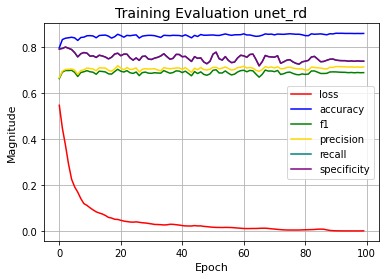

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation {}'.format(model_type), fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

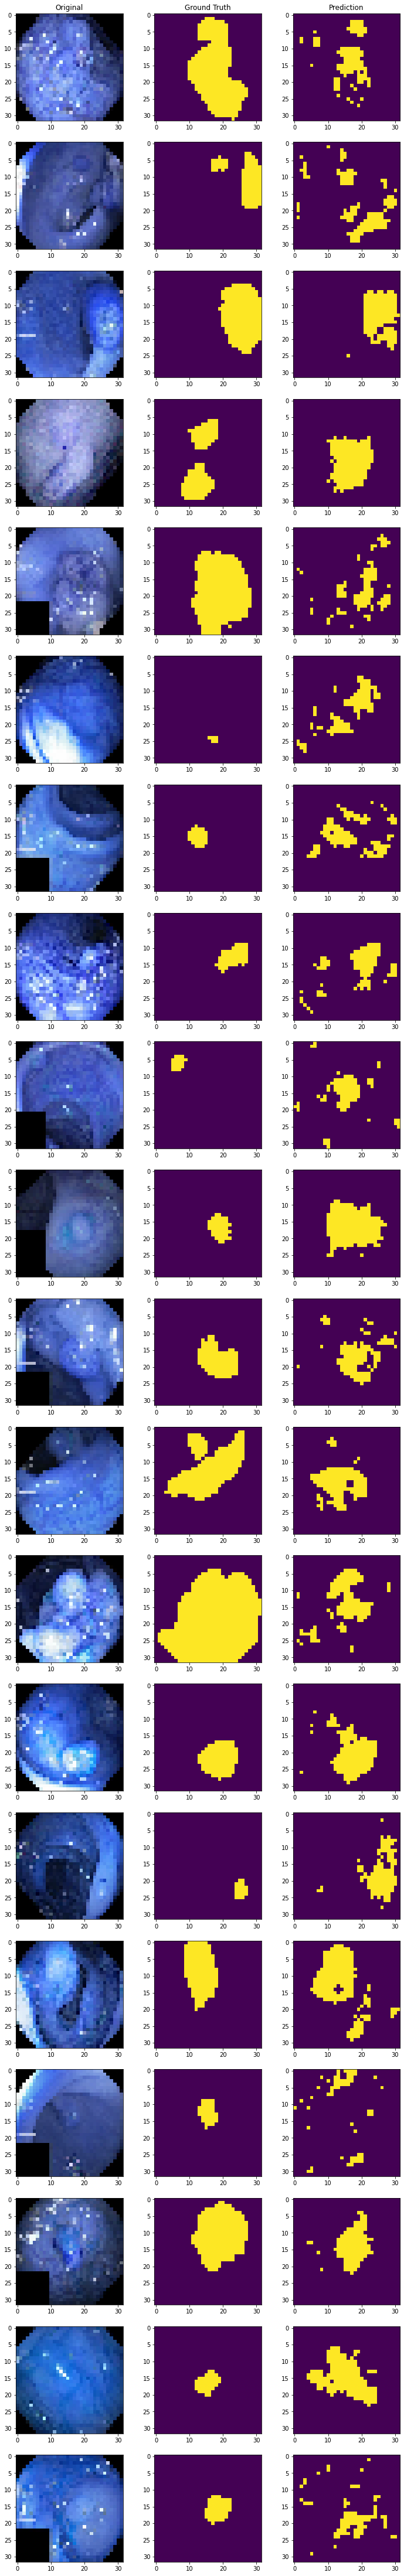

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = 20
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    
    specificity_0 = None
    specificity_1 = None
    
    recall_0 = None
    recall_1 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'dice_0': dice_0,
        'dice_1': dice_1,
    })

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
0,./tmp/test/images/cju0qx73cjw570799j4n5cjze.jpg,./tmp/test/masks/cju0qx73cjw570799j4n5cjze.tiff,0.531913,0.666467,0.778320,0.832776,0.652587,0.652587,0.753796,0.310030,0.984419,0.320755,0.984419,0.320755,1.002320,0.473318
1,./tmp/test/images/cju0roawvklrq0799vmjorwfv.jpg,./tmp/test/masks/cju0roawvklrq0799vmjorwfv.tiff,0.443257,0.522348,0.806641,0.521256,0.524679,0.524679,0.803181,0.083333,0.881134,0.168224,0.881134,0.168224,0.760684,0.153846
2,./tmp/test/images/cju0s2a9ekvms080138tjjpxr.jpg,./tmp/test/masks/cju0s2a9ekvms080138tjjpxr.tiff,0.789465,0.876501,0.929688,0.953275,0.832105,0.832105,0.918552,0.660377,0.997543,0.666667,0.997543,0.666667,0.397727,0.795455
3,./tmp/test/images/cju0sr5ghl0nd08789uzf1raf.jpg,./tmp/test/masks/cju0sr5ghl0nd08789uzf1raf.tiff,0.522579,0.638788,0.818359,0.627738,0.655756,0.655756,0.807453,0.237705,0.875421,0.436090,0.875421,0.436090,0.496689,0.384106
4,./tmp/test/images/cju0t4oil7vzk099370nun5h9.jpg,./tmp/test/masks/cju0t4oil7vzk099370nun5h9.tiff,0.475156,0.609372,0.733398,0.765223,0.612990,0.612990,0.708645,0.241667,0.969343,0.256637,0.969343,0.256637,1.127517,0.389262
5,./tmp/test/images/cju0tl3uz8blh0993wxvn7ly3.jpg,./tmp/test/masks/cju0tl3uz8blh0993wxvn7ly3.tiff,0.445312,0.471074,0.890625,0.497274,0.447498,0.447498,0.890625,0.000000,0.894995,0.000000,0.894995,0.000000,0.089286,0.000000
6,./tmp/test/images/cju15l5ubz9yh0855b3ivdpse.jpg,./tmp/test/masks/cju15l5ubz9yh0855b3ivdpse.tiff,0.567565,0.661904,0.908203,0.615990,0.905792,0.905792,0.905622,0.229508,0.908359,0.903226,0.908359,0.903226,0.040000,0.373333
7,./tmp/test/images/cju15ptjtppz40988odsm9azx.jpg,./tmp/test/masks/cju15ptjtppz40988odsm9azx.tiff,0.622268,0.725174,0.919922,0.678737,0.829065,0.829065,0.916667,0.327869,0.930857,0.727273,0.930857,0.727273,0.185185,0.493827
8,./tmp/test/images/cju16b6ynq8e40988m8vx0xnj.jpg,./tmp/test/masks/cju16b6ynq8e40988m8vx0xnj.tiff,0.444824,0.470801,0.889648,0.489785,0.453234,0.453234,0.889648,0.000000,0.906468,0.000000,0.906468,0.000000,0.336283,0.000000
9,./tmp/test/images/cju16d65tzw9d0799ouslsw25.jpg,./tmp/test/masks/cju16d65tzw9d0799ouslsw25.tiff,0.536871,0.643437,0.853516,0.613402,0.923469,0.923469,0.846939,0.226804,0.846939,1.000000,0.846939,1.000000,0.000000,0.369748


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.557641,0.652891,0.852490,0.681850,0.719125,0.719125,0.840584,0.274699,0.927441,0.510810,0.927441,0.510810,0.447772,0.396751
std,0.117940,0.127737,0.094299,0.140580,0.165075,0.165075,0.110067,0.194445,0.045350,0.339190,0.045350,0.339190,0.395572,0.239388
min,0.337547,0.470801,0.525391,0.488834,0.447498,0.447498,0.448980,0.000000,0.846939,0.000000,0.846939,0.000000,0.000000,0.000000
25%,0.470655,0.581575,0.817871,0.581714,0.612203,0.612203,0.806385,0.148455,0.898301,0.249278,0.898301,0.249278,0.084140,0.258530
50%,0.529522,0.641113,0.890137,0.653238,0.703154,0.703154,0.885181,0.233607,0.929420,0.447553,0.929420,0.447553,0.367005,0.378720
75%,0.628068,0.735412,0.905273,0.792192,0.870627,0.870627,0.904558,0.381519,0.957088,0.839516,0.957088,0.839516,0.745000,0.551346
max,0.789465,0.876501,0.935547,0.953275,0.926864,0.926864,0.928726,0.660377,0.997543,1.000000,0.997543,1.000000,1.254545,0.795455


In [8]:
df_scores.describe().to_csv("{}-scores-kvasir.csv".format(model_type))

In [9]:
model_type     = 'unet'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, a

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.70it/s, loss=0.62]


Ave Loss: 0.6320551863738468
Ave Accuracy: 0.7158984375
Ave F1: 0.6095360683758616
Ave Precision: 0.6355840432724655
Ave Recall: 0.77599326595236
Ave Specificity: 0.77599326595236
Saving model to test.pth...
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:09<00:00, 14.09it/s, loss=0.565]


Ave Loss: 0.5404202456985201
Ave Accuracy: 0.809384765625
Ave F1: 0.6816231424498523
Ave Precision: 0.6847955944200639
Ave Recall: 0.8139235788937383
Ave Specificity: 0.8139235788937383
Saving model to test.pth...
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:10<00:00, 13.53it/s, loss=0.469]


KeyboardInterrupt: 

In [ ]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation ({})'.format(model_type), fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    
    specificity_0 = None
    specificity_1 = None
    
    recall_0 = None
    recall_1 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'dice_0': dice_0,
        'dice_1': dice_1,
    })

plt.show()

In [ ]:
df_scores_unet = pd.DataFrame(scores)

df_scores_unet

In [ ]:
df_scores_unet.describe()

In [ ]:
df_scores.describe().to_csv("{}-scores-kvasir.csv".format(model_type))

In [ ]:
df_scores.describe()

In [ ]:
df_scores_unet.describe()